In [2]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
72995,72995,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,"3,429,595.0",NaN,nan,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/1an4r_venta_depart...,AVISO LEGAL: Las descripciones arquitectónicas...,Departamento - Recoleta,NaN
33746,33746,sell,apartment,Posadas,|Argentina|Misiones|Posadas|,Argentina,Misiones,"3,429,886.0","-27.3577742,-55.8972",-27.3577742,...,30.0,nan,"31,666.66666666667",nan,1.0,nan,http://www.properati.com.ar/18ajb_venta_depart...,Muy lindo y luminoso departamento en el barrio...,VILLA SARITA - EN VENTA MUY LINDO DEPTO DE 1 DORM,https://thumbs4.properati.com/7/3TlHAXsEncEY8H...
103921,103921,sell,apartment,Villa La Angostura,|Argentina|Neuquén|Villa La Angostura|,Argentina,Neuquén,"3,832,711.0",NaN,nan,...,55.0,nan,nan,nan,nan,nan,http://www.properati.com.ar/1bslh_venta_depart...,96 unidades exclusivas. Amenities de categoría...,Departamento - La Villa,https://thumbs4.properati.com/0/8QfsgjAJ16wwGI...
101850,101850,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,"3,427,753.0",NaN,nan,...,220.0,nan,"2,045.4545454545453",nan,nan,"8,500.0",http://www.properati.com.ar/1bpw2_venta_casa_t...,MIERES PROPIEDADES - COMERCIALIZACIÓN EN EXCLU...,"Santa Catalina, Villanueva - Casa en Venta",https://thumbs4.properati.com/8/YsKIaO6CWL5vWi...
20185,20185,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,"3,427,467.0","-34.556141,-58.550386",-34.556141,...,20.0,nan,"16,500.0",nan,5.0,nan,http://www.properati.com.ar/17btd_venta_casa_v...,Corredor Responsable: Daniel Acosta - CSI 5953...,"Casa 5 ambientes, Villa Ballester",https://thumbs4.properati.com/3/d_RT4W9E98m7sq...
94253,94253,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,"3,436,109.0",NaN,nan,...,101.0,"2,783.0188679245284","2,920.7920792079212",nan,nan,nan,http://www.properati.com.ar/1bfaz_venta_depart...,Semipiso de 4 ambientes al contrafrente.- Entr...,Departamento en Barrio Norte,https://thumbs4.properati.com/6/I_xKTmoI4BhLpL...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
# Columna price_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 33562
Porcentaje de registros con NaN: 27.686850354726943
Contamos cantidad de registros unicos:
            price_per_m2  count
0     1.5102040816326532      1
1     3.2085561497326203      1
2      7.462100384887282      1
3      7.987660441800253      1
4      8.291223078055243      1
...                  ...    ...
25180        1,825,000.0      1
25181        2,000,000.0      1
25182        2,300,000.0      1
25183        2,600,000.0      1
25184       3,999,999.96      1

[25185 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

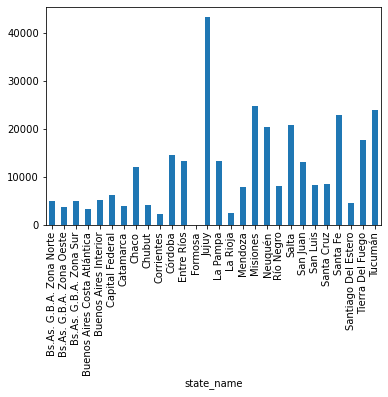

In [5]:
#graficamos el dato por Estado con el fin de observar los rangos de precios por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_per_m2'].mean().plot.bar()

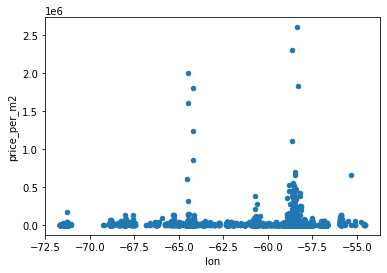

In [6]:
#graficamos un plot para visualizar la dispersión del precio por metro cuadrado que se calcula sobre la superficie cubierta por longitud 
# y observamos como los valores más extremos se ubican en en la longitud cercana a -58 y -65
my_plot_price_per_m2 = data.plot("lon", "price_per_m2", kind="scatter")
plt.show()

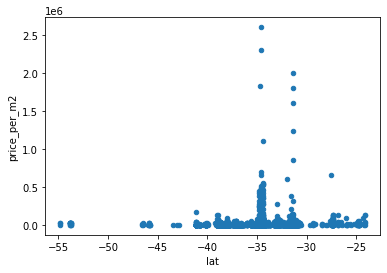

In [10]:
#graficamos un plot para visualizar la dispersión del precio por metro cuadrado que se calcula sobre la superficie cubierta por longitud 
# y observamos como los valores más extremos se ubican en en la longitud cercana a -31 y -35
my_plot_price_per_m2 = data.plot("lat", "price_per_m2", kind="scatter")
plt.show()

In [7]:
data.price_per_m2.describe()

count              87,658.0
mean     6,912.215704519683
std     28,378.644733892193
min      1.5102040816326532
25%                 1,550.0
50%      2,213.114754098361
75%     3,355.5486111111113
max            3,999,999.96
Name: price_per_m2, dtype: float64

Detalle de análisis de columnas:
* `price_per_m2` -> Esta columna tiene 33.562 datos nulos o su equivalente 27.68%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones:
Los datos tienen un valor máximo de 3,999,999 dolares por metro cuadrado, frente a una media de 6,912 dolares por metro cuadrado.
1. Extrayendo el dato de las columnas title y description
2. calculando el precio al dividir el precio aprox en usd entre la superficie cubierta en m2
3. calculando un valor promedio para el metro cuadrado de las propiedades de acuerdo al barrio o place name donde se encuentren ubicados.

### Detalle de valores extremos en la  columna `price_per_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 10 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

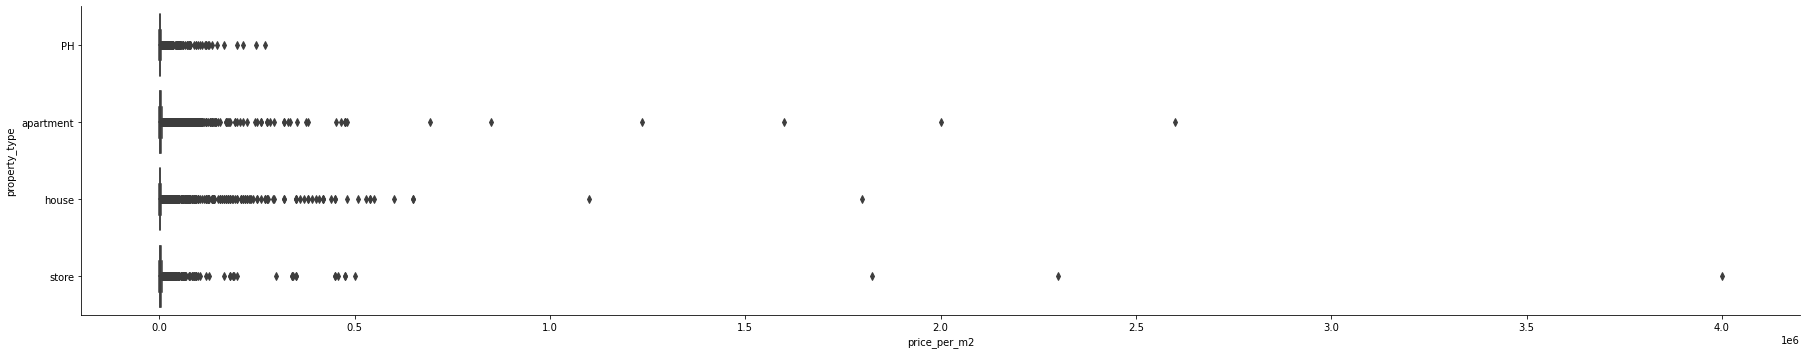

In [8]:
sns.catplot(data=data, x= 'price_per_m2', y="property_type", kind="box", height=5, aspect=5,)
